<a href="https://colab.research.google.com/github/junheecho-zz/play2021/blob/master/dataset_muscat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DuckDuckGo

Alternatively, you can use [DuckDuckGo](https://duckduckgo.com/) instead of Bing. DuckDuckGo is a "privacy first" search service, with many useful features. However, they do not have an official API, so the function we'll show here relies on the particular structure of their web interface, which may change.

To use DuckDuckGo to download images, use the `search_images_ddg` function from `fastbook`, like so:

## Reference
1. https://colab.research.google.com/github/fastai/course20/blob/master/images.ipynb

In [ ]:
!pip install fastbook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Configurable parameters

In [ ]:
# how many images for each category. e.g) 한옥, 모던 인터리어
# it should be less than 1000. limited by search_images_ddg API.
max_images = 500

# save root directory
root_dir = f'/content/drive/MyDrive/w2/design-style/images_{max_images}'

# categories. (class name, search keyword)
categories = [('hanok', '한옥 인테리어'), ('modern', '모던 인테리어')]

### Download images

In [ ]:
from fastbook import *

# return {'class': [image_path]}
# e.g) {'hanok': [xxxx.jpg], 'modern': [yyyy.jpg]}
def download_images(root_dir, categories, max_images):
  result = {}
  for category,search in categories:
    urls = search_images_ddg(search, max_images=max_images)
    for i, url in enumerate(urls):
      dest = f'{root_dir}/{category}_{i:04}.jpg'
      #print (dest)
      try:
        download_url(url, dest)
        result[category] = result.get(category, []) + [dest]
        
      except Exception as ex:
        print (ex)
        print ('Fail to download', url)
        continue
  return result

downloaded = download_images(root_dir, categories, max_images)
#downloaded = download_images('/content/drive/MyDrive/w2/design-style/images_10', categories, 10)
for category in downloaded:
  print (f'{category}: {len(downloaded[category])}')

### view downloaded images

NOTE: Several images are deleted manually after downloading

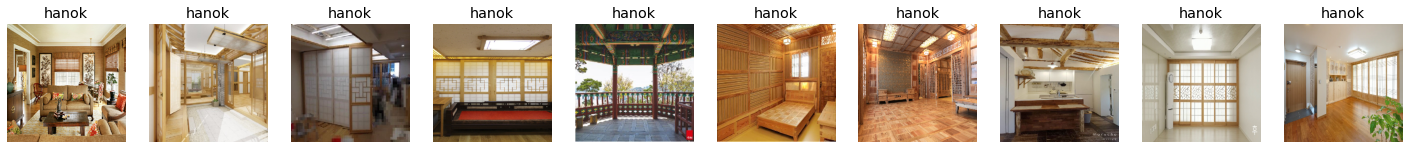

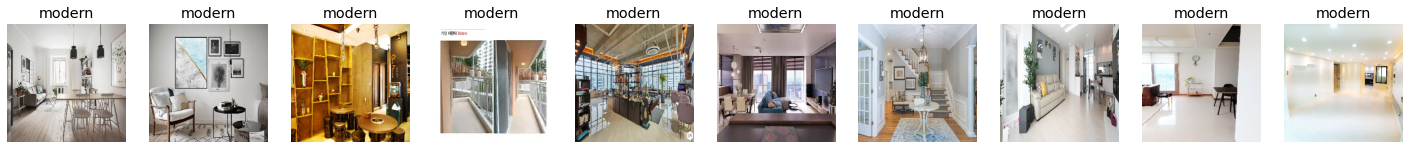

In [ ]:
import glob, os
from keras.preprocessing.image import load_img, img_to_array

## visualize some images / labels
def plot_dataset_samples(root_dir=root_dir, samples=10, classes=['hanok', 'modern'], extension='jpg', W=256, H=256):
  for target_cls in classes:
      n_cols = 10 # # of sample plot
      fig, axs = plt.subplots(ncols=n_cols, figsize=(25, 3))

      image_files = glob.glob(os.path.join(root_dir, f'{target_cls}_*.{extension}'))[:n_cols]
  
      for i, image_file in enumerate(image_files):
          img = load_img(image_file, target_size=(W, H))
          img = img_to_array(img)
  
          axs[i].imshow(np.uint8(img))
          axs[i].axis('off')
          axs[i].set_title(target_cls)
  
      plt.show()

plot_dataset_samples()